In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
# state transition matrices for linear system: 
#     x(t+1) = A x (t) + B u(t)
A = np.kron(np.eye(2),np.array([[1,1],[0,0.9]]))
B = np.kron(np.eye(2),np.array([[0],[1]]))
C = np.kron(np.eye(2),np.array([[1,0]]))

x0 = np.zeros((4,1))

# load target data as csv file
target_data = np.genfromtxt('fig8.csv', delimiter=',').T
T = target_data.shape[1]

# plotting defaults
linewidth = 2
colors = [ '#2D328F', '#F15C19',"#81b13c","#ca49ac","000000"]

In [3]:
def run_open_loop_control(A,B,C,x0,u,T):
    # simulates the linear system (A,B) with fixed open loop control sequence u[t]
    # from initial condition x0 for T time steps
    #
    # returns matrix y of output trajectory.
    # dim 1 of these matrices is indexed by time.
    x = x0
    y = np.array([]).reshape(2,0)
    for t in range(T+1):
        if t<T:
            x = A.dot(x)+B.dot(u[:,t:(t+1)])
        else:
            x = A.dot(x)
        y = np.hstack((y,C.dot(x)))
    return y[:,-T:]

def simple_ILC_PD(target_data,A,B,C,x0,T,k_P,k_D,n_iter,frame_rate):
    # runs PD controller for ILC using parameters k_P for the proportional term and k_D for the derivative term
    # target_data is the trajectory to emulate
    #
    # uses the true linear system dynamics are given by (A,B)
    # from initial condition x0 for T time steps (though only through oracle access)
    #
    # n_iter is the number of iterations of ILC to run
    # frame_rate is the frequency at which we store ILC iterations for later plotting

    output_store = []
    u = np.zeros(target_data.shape)
    for iter in range(n_iter):
        # what do I actually observe with the current control?
        y_act = run_open_loop_control(A,B,C,x0,u,T)
        # what is the error between what I observe and the truth?
        err = target_data-y_act
        # error derivartive
        err_diff = err-np.hstack((np.zeros((2,1)),err[:,0:(T-1)]))
        # ILC Law:
        u = u + k_P*err + k_D*err_diff
    
        if np.mod(iter-1,frame_rate)==0:
            output_store.append(y_act)
    return output_store

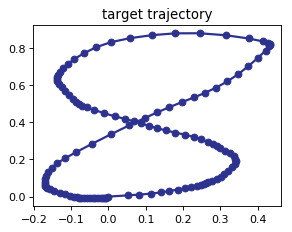

In [4]:
output_store = simple_ILC_PD(target_data,A,B,C,x0,T,k_P=0.0,k_D=0.1,n_iter=21,frame_rate=19)

plt.figure(num=None, figsize=(4, 3), dpi=80)
plt.plot(target_data[0,:], target_data[1,:], 'o-',color=colors[0],linewidth=linewidth)
plt.title('target trajectory')
plt.show()

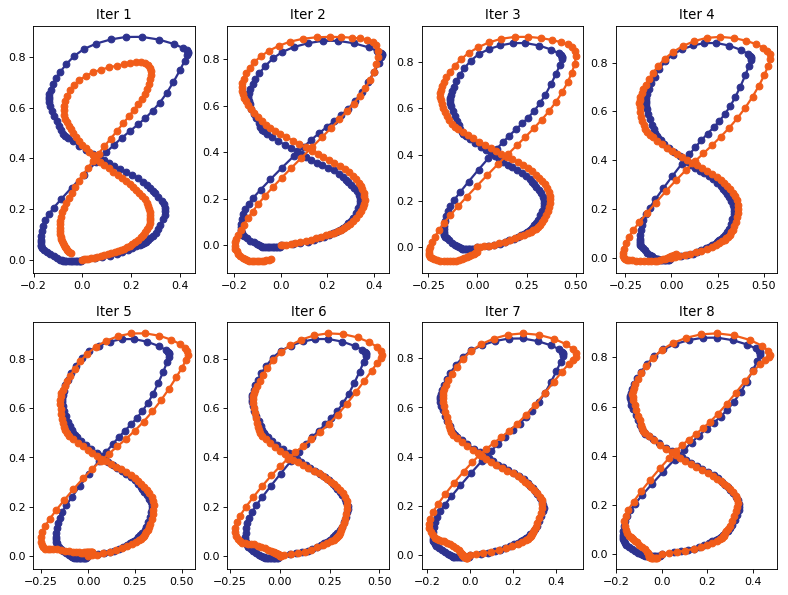

In [5]:
n_iter=9
output_store = simple_ILC_PD(target_data,A,B,C,x0,T,k_P=0.0,k_D=0.1,n_iter=n_iter,frame_rate=1)

plt.figure(num=None, figsize=(12, 9), dpi=80)
for frame in range(1,n_iter):
    plt.subplot(2,4,frame)
    plt.plot(target_data[0,:], target_data[1,:], 'o-',color=colors[0],linewidth=linewidth)
    plt.plot(output_store[frame][0,:], output_store[frame][1,:], 'o-',color=colors[1],linewidth=linewidth)        
    plt.title('Iter '+str(frame))
plt.show()

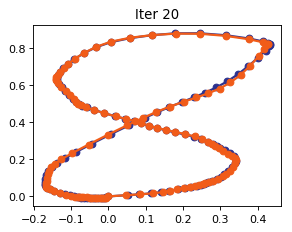

In [6]:
output_store = simple_ILC_PD(target_data,A,B,C,x0,T,k_P=0.0,k_D=0.1,n_iter=21,frame_rate=19)

plt.figure(num=None, figsize=(4, 3), dpi=80)
plt.plot(target_data[0,:], target_data[1,:], 'o-',color=colors[0],linewidth=linewidth)
plt.plot(output_store[1][0,:], output_store[1][1,:], 'o-',color=colors[1],linewidth=linewidth)        
plt.title('Iter 20')
plt.show()